In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
import os,random,cv2

In [5]:
import theano


In [9]:
TRAIN_DIR ='train/'
TEST_DIR = 'test/'

ROWS = 64
COLS = 64
CHANNELS = 3

#train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] # use this for full dataset
train_dogs =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
dog_label =['dog' for i in os.listdir(TRAIN_DIR) if 'dog' in i]
dog=zip(train_dogs,dog_label)

train_cats =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'cat' in i]
cat_label =['cat' for i in os.listdir(TRAIN_DIR) if 'cat' in i]
cat=zip(train_cats,cat_label)

test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)]
# slice datasets for memory efficiency on Kaggle Kernels, delete if using full dataset



train_images = dog[:10000] + cat[:10000]
random.shuffle(train_images)
a=zip(*train_images)
train=a[0]
label=a[1]
label=np.asarray(label)

j=7500
my_test=dog[j:j+1000] +cat[j:j+1000]
random.shuffle(my_test)
b=zip(*my_test)
testimage=b[0]
testlabel=b[1]
testlabel=np.asarray(testlabel)


print (train[0],label[0])

def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE) #cv2.IMREAD_GRAYSCALE
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

def prep_data(images):
    count = len(images)
    data = np.ndarray((count, ROWS, COLS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image.T
    return data

train = prep_data(train)
test=prep_data(testimage)
print (train.shape,test.shape)
train= train.swapaxes(1,2)
test=test.swapaxes(1,2)
print (train.shape,test.shape)


TypeError: 'zip' object is not subscriptable

In [7]:
seed=7
np.random.seed(seed)

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

dog


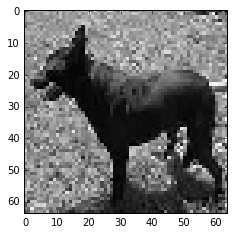

In [8]:
i=1
plt.subplot(221)
plt.imshow(train[i],cmap=plt.get_cmap('gray'))
print label[i]

In [9]:
X_train=train.reshape(train.shape[0],1,64,64).astype('float32')
X_test=test.reshape(test.shape[0],1,64,64).astype('float32')

In [10]:
x_train=X_train/255
x_test=X_test/255

b,c=np.unique(label,return_inverse=True)
x,y=np.unique(testlabel,return_inverse=True)

y_train=np_utils.to_categorical(c)
y_test=np_utils.to_categorical(y)
j=21
print label[j]
print y_train[j]
num_classes=y_test.shape[1]

cat
[ 1.  0.]


In [11]:
def network():
    model=Sequential()
    model.add(Convolution2D(32,5,5,border_mode='valid',input_shape=(1,64,64),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [12]:
model1=network()
model1.fit(x_train,y_train,validation_data=(x_test,y_test),nb_epoch=10,batch_size=200,verbose=2)

scores = model1.evaluate(x_test,y_test,verbose=0)
print("Baseline Error: %.2f%%" %(100-scores[1]*100))

Train on 20000 samples, validate on 2000 samples
Epoch 1/10
113s - loss: 0.7088 - acc: 0.5825 - val_loss: 0.6021 - val_acc: 0.6910
Epoch 2/10
117s - loss: 0.5771 - acc: 0.7036 - val_loss: 0.5142 - val_acc: 0.7490
Epoch 3/10
119s - loss: 0.5290 - acc: 0.7375 - val_loss: 0.4792 - val_acc: 0.7640
Epoch 4/10
122s - loss: 0.4907 - acc: 0.7634 - val_loss: 0.4499 - val_acc: 0.7905
Epoch 5/10
119s - loss: 0.4641 - acc: 0.7792 - val_loss: 0.4120 - val_acc: 0.8125
Epoch 6/10
125s - loss: 0.4427 - acc: 0.7883 - val_loss: 0.4051 - val_acc: 0.8255
Epoch 7/10
138s - loss: 0.4164 - acc: 0.8069 - val_loss: 0.3679 - val_acc: 0.8420
Epoch 8/10
150s - loss: 0.3997 - acc: 0.8180 - val_loss: 0.3672 - val_acc: 0.8430
Epoch 9/10
145s - loss: 0.3852 - acc: 0.8275 - val_loss: 0.3560 - val_acc: 0.8400
Epoch 10/10
144s - loss: 0.3712 - acc: 0.8339 - val_loss: 0.3813 - val_acc: 0.8285
Baseline Error: 17.15%


In [13]:
def larger_model():
    # create model
    model = Sequential()
    model.add(Convolution2D(30, 5, 5, border_mode='valid', input_shape=(1, 64, 64), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(15, 3, 3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [14]:
model = larger_model()
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), nb_epoch=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 20000 samples, validate on 2000 samples
Epoch 1/10
135s - loss: 0.6530 - acc: 0.6061 - val_loss: 0.5942 - val_acc: 0.6870
Epoch 2/10
134s - loss: 0.5876 - acc: 0.6885 - val_loss: 0.5608 - val_acc: 0.7035
Epoch 3/10
137s - loss: 0.5436 - acc: 0.7240 - val_loss: 0.5240 - val_acc: 0.7290
Epoch 4/10
135s - loss: 0.5041 - acc: 0.7512 - val_loss: 0.4708 - val_acc: 0.7790
Epoch 5/10
139s - loss: 0.4834 - acc: 0.7670 - val_loss: 0.4351 - val_acc: 0.7935
Epoch 6/10
130s - loss: 0.4515 - acc: 0.7881 - val_loss: 0.3921 - val_acc: 0.8190
Epoch 7/10
132s - loss: 0.4296 - acc: 0.8024 - val_loss: 0.3767 - val_acc: 0.8265
Epoch 8/10
125s - loss: 0.4132 - acc: 0.8130 - val_loss: 0.3468 - val_acc: 0.8440
Epoch 9/10
123s - loss: 0.3829 - acc: 0.8263 - val_loss: 0.3060 - val_acc: 0.8635
Epoch 10/10
141s - loss: 0.3542 - acc: 0.8420 - val_loss: 0.2685 - val_acc: 0.8915
Baseline Error: 10.85%


In [15]:
test1=prep_data(test_images)

In [17]:
print test1.shape
test_x= test1.swapaxes(1,2)

(12500, 64, 64)


In [18]:
test_X=test_x.reshape(test_x.shape[0],1,64,64).astype('float32')


In [19]:
test_X=test_X/255

In [20]:
p=model1.predict(test_X,batch_size=32,verbose=0)
q=model.predict(test_X,batch_size=32,verbose=0)

[ 0.13338299  0.86661702]
[ 0.06099266  0.93900734]


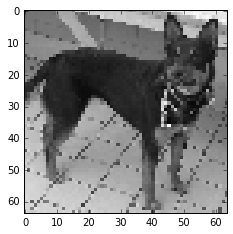

In [61]:
i=6
print p[i]
print q[i]
plt.subplot(221)
plt.imshow(test_x[i],cmap=plt.get_cmap('gray'))

In [112]:
id=np.arange(1,12501)
print id[12499]
prob1=p[:,1]
prob2=q[:,1]

print id.shape,prob1.shape,prob2.shape

12500
(12500,) (12500,) (12500,)


In [113]:
prob1=prob1.reshape(12500,1)
prob2=prob2.reshape(12500,1)
id=id.reshape(12500,1)

In [114]:
print id.shape,prob1.shape,prob2.shape
h=np.concatenate((id,prob1),axis=1)
i=np.concatenate((id,prob2),axis=1)

(12500, 1) (12500, 1) (12500, 1)


In [115]:
np.savetxt("CNN1.csv",h,delimiter=",")
np.savetxt("CNN2.csv",i,delimiter=",")